<a href="https://colab.research.google.com/github/rjrahul24/cnn-logistic-image-analysis/blob/main/Logistic_Regression_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression in PyTorch
In this notebook we will be working on a problem to solve handwriting recognition using PyTorch. We will be using the MNIST dataset for this purpose and start with exploration of this dataset.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

The MNIST dataset is very popular machine learning dataset, consisting of 70000 grayscale images of handwritten digits, of dimensions 28x28. 
We'll be using it as our example dataset for this section of the tutorial, with the goal being to predict which digit is in each image.

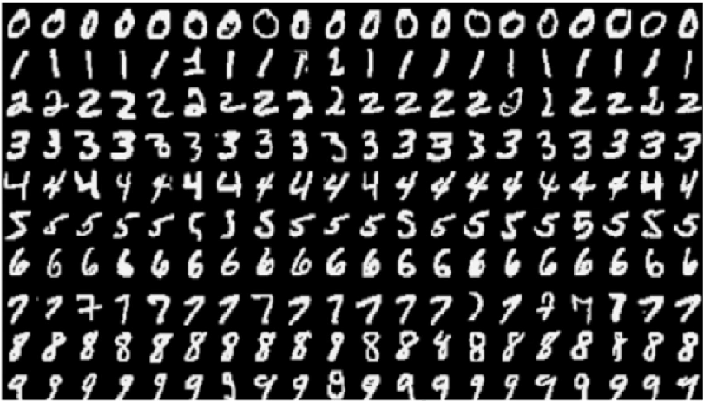

The first (and often most important) step in machine learning is preparing the data.
This can include downloading, organizing, formatting, shuffling, pre-processing, augmenting, and batching examples so that they can be fed to a model.
The `torchvision` package makes this easy by implementing many of these, allowing us to put these datasets into a usable form in only a few lines of code.
First, let's download the train and test sets of MNIST:

In [ ]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


Since the input we will be putting into our model cannot be images, we use the ToTensor() transform to change the Pillow (Image) type to a Tensor type that we can further use for building and training our model

Let's look at an example image from the train set and its label.
Notice that the `image` tensor defaults to something 3-dimensional.
The "1" in the first dimension indicates that the image only has one channel (i.e. grayscale).
We need to get rid of this to visualize the image with `imshow`.

Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
The label for this image: 1


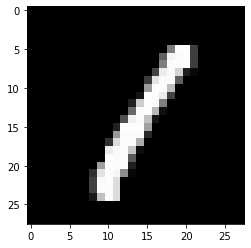

In [ ]:
# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_train[3]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))